#### 참고 사이트 : https://zephyrus1111.tistory.com/96

### 1. Grubbs's Test

#### - Grubbs's Test는 정규분포를 따르는 데이터에서 하나의 이상치를 발견할 수 있는 검정 방법
#### - Grubbs's Test는 관측된 데이터가 정규분포로 추출되거나 데이터의 분포가 근사적으로 정규분포를 따른다고 가정한다. 

#### 따라서 이 검정법을 수행하기 위해서는 사전에 데이터의 분포가 정규분포를 따른다고 볼 수 있는지 확인해야 한다.
 

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from scipy.stats import t
from scipy.stats import probplot

In [148]:
data = [199.31, 199.53, 200.19, 200.82, 201.92, 201.95, 202.18, 245.57]
data = np.array(data)

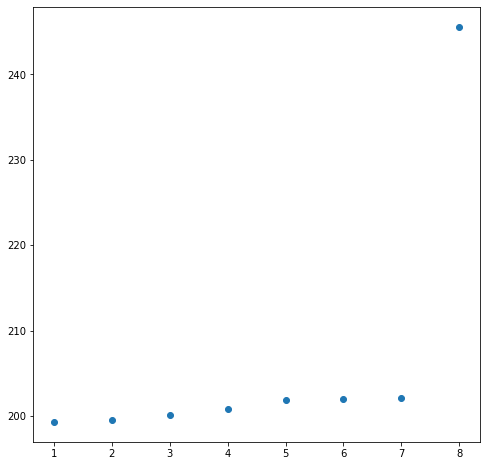

In [149]:
fig = plt.figure(figsize=(8,8))
fig.set_facecolor('white')
plt.scatter(range(len(data)), data)
plt.xticks(range(len(data)), range(1, len(data) +1))
plt.show()

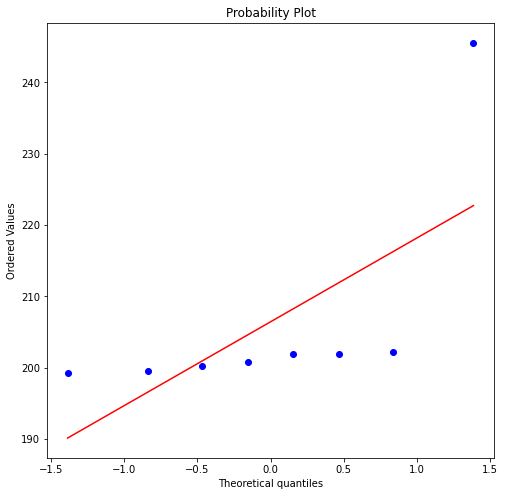

In [150]:
fig = plt.figure(figsize=(8,8))
fig.set_facecolor('white')
ax = fig.add_subplot()
probplot(data, plot=ax)
plt.show()

In [151]:
def grubbs_test(data,two_sided=True,alpha=0.05):
    mean = np.mean(data)
    std = np.std(data,ddof=1)
    constant = (len(data)-1)/np.sqrt(len(data))
    if two_sided:    
        diff = np.abs(data-mean)
        max_diff = np.max(diff)
 
        G = max_diff/std
        sig_alpha = alpha/(2*len(data))
        t_critical = t.ppf(1-sig_alpha,len(data)-2)
        critical_val = constant*np.sqrt(np.square(t_critical)/(len(data)-2+np.square(t_critical)))
        if G > critical_val:  
            idx = np.where(diff==max_diff)[0][0]
            suspected_outlier = data[idx]
            outlier_idx = idx
            return (outlier_idx, suspected_outlier, G, critical_val)
        else:
            return (G, critical_val)
    else: ## one sided
        ## first test whether max point is outlier
        result = []
        G = (np.max(data)-mean)/std
        sig_alpha = alpha/(len(data))
        t_critical = t.ppf(1-sig_alpha,len(data)-2)
        critical_val = constant*np.sqrt(np.square(t_critical)/(len(data)-2+np.square(t_critical)))
        if G > critical_val:  
            idx = np.where(x==np.max(data))[0][0]
            suspected_outlier = data[idx]
            outlier_idx = idx
            result.append((outlier_idx, suspected_outlier, G, critical_val))
        ## next, test whether min point is outlier
        G = (mean-np.min(data))/std
        if G > critical_val: 
            idx = np.where(x==np.min(data))[0][0]
            suspected_outlier = data[idx]
            outlier_idx = idx
            result.append((outlier_idx, suspected_outlier, G)) 
        return result

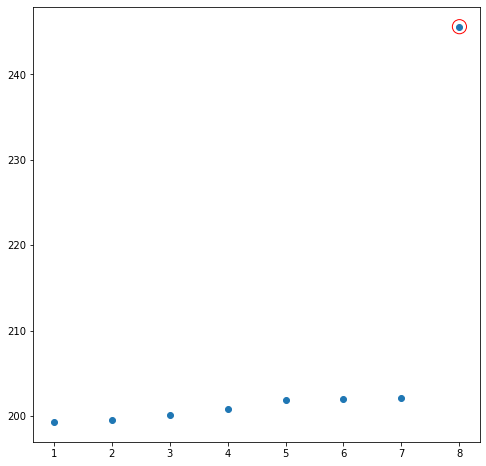

In [152]:
res = grubbs_test(data,two_sided=True,alpha=0.05)
 
if len(res) == 4:
    fig = plt.figure(figsize=(8,8))
    fig.set_facecolor('white')
    plt.scatter(range(len(data)), data)
    plt.scatter(res[0],res[1],s=200,facecolor='none',edgecolors='r')
    plt.xticks(range(len(data)), range(1,len(data)+1))
    plt.show()
else:
    print(res)
    print('There is no outlier')

In [153]:
data = [9.1, 26.8, 81.5, 19.1, 15.2, 22.6, 28.8, 24.1, 23.6,
        18.6, 17.3, 25.8, 75.1, 11.9, 20.1, 80.3, 14.1, 26.5]
data = np.array(data)

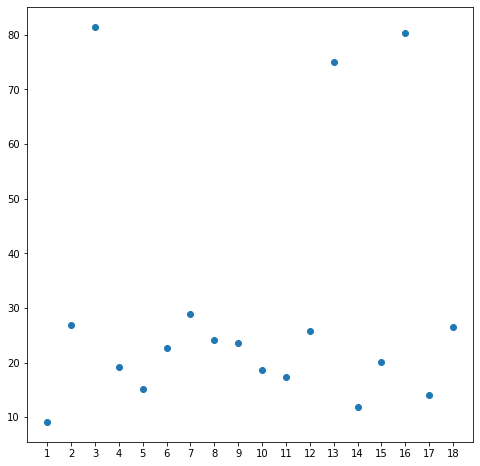

In [154]:
fig = plt.figure(figsize=(8,8))
fig.set_facecolor('white')
plt.scatter(range(len(data)), data)
plt.xticks(range(len(data)), range(1, len(data) +1))
plt.show()

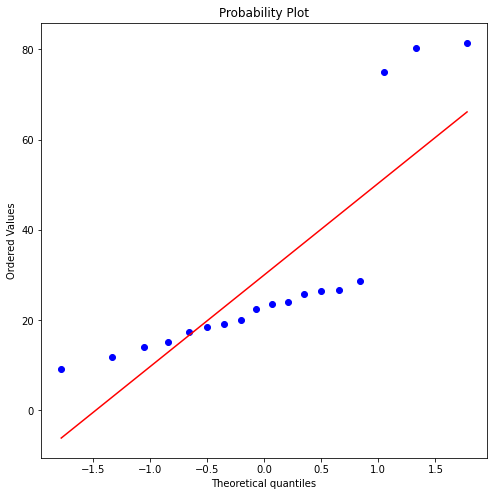

In [155]:
fig = plt.figure(figsize=(8,8))
fig.set_facecolor('white')
ax = fig.add_subplot()
probplot(data, plot=ax)
plt.show()

In [156]:
res = grubbs_test(data,two_sided=True,alpha=0.05)
 
if len(res) == 4:
    fig = plt.figure(figsize=(8,8))
    fig.set_facecolor('white')
    plt.scatter(range(len(data)), data)
    plt.scatter(res[0],res[1],s=200,facecolor='none',edgecolors='r')
    plt.xticks(range(len(data)), range(1,len(data)+1))
    plt.show()
else:
    print(res)
    print('There is no outlier')

(2.2207310951297967, 2.651599119336694)
There is no outlier


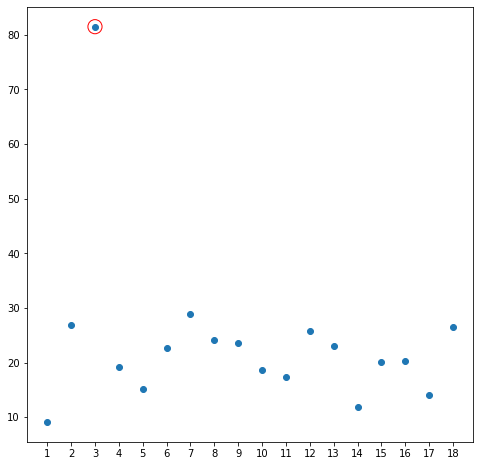

In [157]:
temp_data = [9.1, 26.8, 81.5, 19.1, 15.2, 22.6, 28.8, 24.1, 23.6,
        18.6, 17.3, 25.8, 23.1, 11.9, 20.1, 20.3, 14.1, 26.5]
temp_data = np.array(temp_data)
 
res = grubbs_test(temp_data,two_sided=True,alpha=0.1)
 
if len(res) == 4:
    fig = plt.figure(figsize=(8,8))
    fig.set_facecolor('white')
    plt.scatter(range(len(temp_data)), temp_data)
    plt.scatter(res[0],res[1],s=200,facecolor='none',edgecolors='r')
    plt.xticks(range(len(temp_data)), range(1,len(temp_data)+1))
    plt.show()
else:
    print(res)
    print('There is no outlier')

In [158]:
print(res[2])

3.7519852755088587


##### Grubb's Test는 이상치가 여러 개 있을 때는 사용할 수 없다.

## 2. Chauvenet's Criterion

#### Chauvenet's Criterion은 표준 정규분포를 따르는 데이터에서 이상치를 판단하기 위한 하나의 기준이다. 
#### - 평균을 중심으로 면 적 1 - 1/2n을 넘어가는 데이터를 이상치로 판단한다.
#### - 이때에는 1 / 2의 확률로 이상치를 판단한다는 의미로 1 / 2보다 작다면 이상치로 판단하는 것이 합리적이다.
#### - 만약 데이터가 n > 1인 경우 이상치 판단을 위한 구간은 점점 넓어져야 할 것이다. 

In [31]:
import numpy as np
import matplotlib.pyplot as plt
 
from scipy.stats import norm

In [41]:
data = [9.1, 79.5, 26.8, 81.5, 19.1, 15.2, 22.6, 28.8, 24.1, 23.6,
        18.6, 17.3, 25.8, 78.8, 23.1, 11.9, 20.1, 20.3, 14.1, 26.5]
data = np.array(data)

In [42]:
def chauvenet_criterion(data):
    mean = np.mean(data)
    std = np.std(data,ddof=1)
    
    standardized_data = np.abs((data-mean)/std)
    p_val = (1-norm.cdf(standardized_data)) < 1/(4*len(data))
    if len(np.where(p_val==True)[0]) > 0:
        idx = np.where(p_val==True)[0]
        value = data[idx]
        return (idx, value)
    else :
        return False

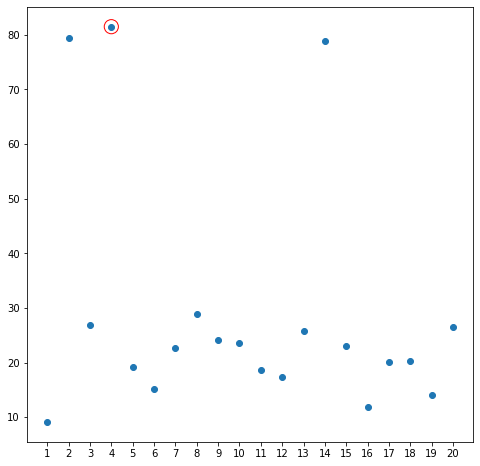

In [43]:
res = chauvenet_criterion(data)

if res:
    fig = plt.figure(figsize=(8,8))
    fig.set_facecolor('white')
    plt.scatter(range(len(data)), data)
    plt.scatter(res[0],res[1],s=200,facecolor='none',edgecolors='r')
    plt.xticks(range(len(data)), range(1,len(data)+1))
    plt.show()
else:
    print('There is no outlier')

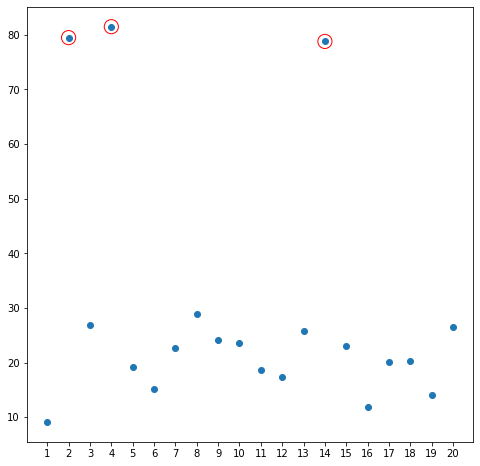

In [44]:
temp_data = data.copy()
outlier_idx = []
max_iter = 4
iter_num = 1
while iter_num <= max_iter:
    res = chauvenet_criterion(temp_data)
    if res:
        so = res[1][0]
        idx = np.where(data == so)[0][0]
        outlier_idx.append(idx)
        temp_data = np.delete(temp_data,res[0][0])
    else:
        break
        
    iter_num += 1
    
outlier_idx = np.array(outlier_idx)
 
fig = plt.figure(figsize=(8,8))
fig.set_facecolor('white')
plt.scatter(range(len(data)), data)
plt.scatter(outlier_idx,data[outlier_idx],s=200,facecolor='none',edgecolors='r')
plt.xticks(range(len(data)), range(1,len(data)+1))
plt.show()

## 3. Peirce's Criterion

#### Peirce's Criterion는 Chauvenet's Criterion 보다 더 엄밀하게 (regorous) 이상치를 탐지할 수 있는 방법이라 한다.
#### 이상치로 의심되는 데이터가 m개 있는 경우 이를 제외하지 않았을 경우의 에러 분포 확률과 제외했을 경우의 에러 분포 확률을 비교하여 전자가 작다면 기각한다.


##### 장점 - 여러 개의 이상치를 잡아낼 수 있고, 구현이 어렵지 않다.
##### 단점 - 데이터의 분포가 정규분포가 아니면 사용하기 어렵다.

In [45]:
import numpy as np
import matplotlib.pyplot as plt
 
from scipy.special import erfc

In [46]:
data = [9.1, 79.5, 26.8, 81.5, 19.1, 15.2, 22.6, 28.8, 24.1, 23.6,
        18.6, 17.3, 25.8, 78.8, 23.1, 11.9, 20.1, 20.3, 14.1, 26.5]
data = np.array(data)

In [47]:
def peirce_dev(N: int, n: int, m: int) -> float:
    """Peirce's criterion
    
    Returns the squared threshold error deviation for outlier identification
    using Peirce's criterion based on Gould's methodology.
    
    Arguments:
        - int, total number of observations (N)
        - int, number of outliers to be removed (n)
        - int, number of model unknowns (m)
    Returns:
        float, squared error threshold (x2)
    """
    # Assign floats to input variables:
    N = float(N)
    n = float(n)
    m = float(m)
 
    # Check number of observations:
    if N > 1:
        # Calculate Q (Nth root of Gould's equation B):
        Q = (n ** (n / N) * (N - n) ** ((N - n) / N)) / N
        #
        # Initialize R values (as floats)
        r_new = 1.0
        r_old = 0.0  # <- Necessary to prompt while loop
        #
        # Start iteration to converge on R:
        while abs(r_new - r_old) > (N * 2.0e-16):
            # Calculate Lamda
            # (1/(N-n)th root of Gould's equation A'):
            ldiv = r_new ** n
            if ldiv == 0:
                ldiv = 1.0e-6
            Lamda = ((Q ** N) / (ldiv)) ** (1.0 / (N - n))
            # Calculate x-squared (Gould's equation C):
            x2 = 1.0 + (N - m - n) / n * (1.0 - Lamda ** 2.0)
            # If x2 goes negative, return 0:
            if x2 < 0:
                x2 = 0.0
                r_old = r_new
            else:
                # Use x-squared to update R (Gould's equation D):
                r_old = r_new
                r_new = np.exp((x2 - 1) / 2.0) * erfc(
                    np.sqrt(x2) / np.sqrt(2.0)
                )
    else:
        x2 = 0.0
    return x2

In [48]:
def peirce_criterion(data):
    mean = np.mean(data)
    std = np.std(data,ddof=1)
 
    N = len(data)
 
    temp_data = data.copy()
    outlier_idx = []
    n = 1 ## 탐지할 이상치 개수
    while n <= N-1:
        dev = np.abs((temp_data - mean)/std)
        R = np.sqrt(peirce_dev(N,n,1))
        idx = np.where(dev>R)[0]
 
        if len(idx) > 0:
            temp_data_points = temp_data[idx]
            temp_idx = []
            for x in temp_data_points:
                temp_idx += list(np.where(data == x)[0])
 
            outlier_idx += temp_idx
            temp_data = np.delete(temp_data,idx)
            n += len(idx)
        else:
            break
 
    outlier_idx = np.array(outlier_idx)
    value = data[outlier_idx]
    
    if len(outlier_idx) > 0:
        return (outlier_idx, value)
    else:
        return False
    

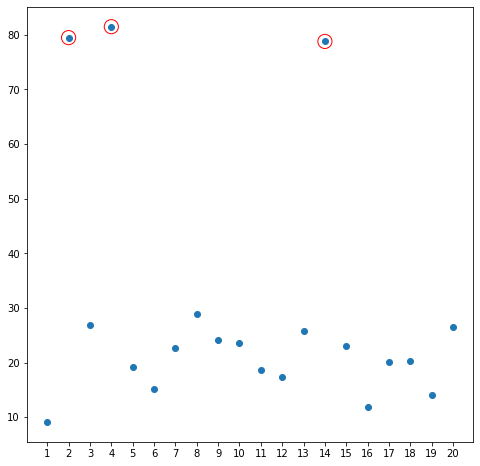

In [49]:
res = peirce_criterion(data)
 
if res:
    fig = plt.figure(figsize=(8,8))
    fig.set_facecolor('white')
    plt.scatter(range(len(data)), data)
    plt.scatter(res[0],res[1],s=200,facecolor='none',edgecolors='r')
    plt.xticks(range(len(data)), range(1,len(data)+1))
    plt.show()
else:
    print('There is no outlier')

## 4. Dixon's Q-Test

#### Dixon's Q-Test는 정규분포로 추출된 데이터의 이상치를 순서 통계량을 이용하여 검정하는 방법이다.

In [50]:
import numpy as np
import matplotlib.pyplot as plt
 
from math import fabs
from collections import deque
from scipy.stats import norm
from scipy.special import erf
from scipy.optimize import root

In [58]:
data = [199.31, 199.53, 200.19, 200.82, 201.92, 201.95, 202.18, 245.57]
data = np.array(data)

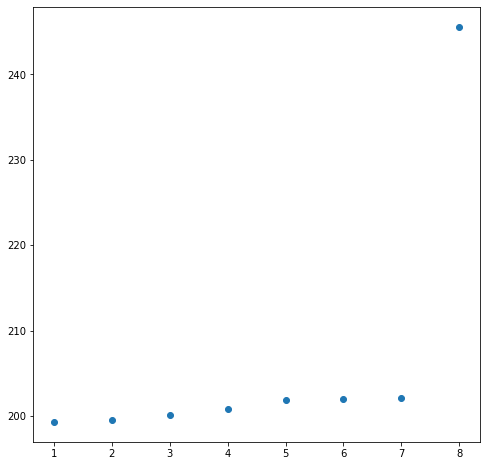

In [59]:
fig = plt.figure(figsize=(8,8))
fig.set_facecolor('white')
plt.scatter(range(len(data)), data)
plt.xticks(range(len(data)), range(1,len(data)+1))
plt.show()

In [60]:
def prod(seq):
    s = deque()
    for x in seq:
        s.appendleft(x) if fabs(x) < 1.0 else s.append(x)
    while len(s) > 1:
        x = s.popleft() * s.pop()
        s.appendleft(x) if fabs(x) < 1.0 else s.append(x)
    return s[0] if s else 1.0

In [61]:
def get_exp_xpower_int(k, b=None):
    '''
    if b == None, b == infty
    '''
    if b:
        if k==0:
            return (np.sqrt(np.pi)/2)*erf(b)
        elif k==1:
            return 0.5*(1-np.exp(-np.square(b)))
        else:
#             return ((k-1)*0.5)*get_exp_xpower_int(k-2,b)-0.5*np.power(b,k-1)*np.exp(-np.square(b))
            return ((k-1)*0.5)*get_exp_xpower_int(k-2,b)-0.5*np.exp(-np.square(b)+(k-1)*np.log(b))
        
    else:
        if k==0:
            return np.sqrt(np.pi)/2
        elif k==1:
            return 1/2
        else:
            return ((k-1)*0.5)*get_exp_xpower_int(k-2)
    
def get_exp_poly_int(coef,b=None):
    res = 0
    for i in range(len(coef)):
#         res += coef[i]*get_exp_xpower_int(i,b)
        res += prod([coef[i],get_exp_xpower_int(i,b)])
    return res
 
def get_polynomial(n,b=None):
    if n == 0:
        return np.array([1])
    elif n == 1:
        if b:
            return np.array([1, -(1-np.exp(-np.square(b)))/(np.sqrt(np.pi)*erf(b))])
        else:
            return np.array([1, -(1/np.sqrt(np.pi))])
    else:
        first = get_polynomial(n-1,b)
 
        ## calculate gamma
        p = np.poly1d(first)
        p2 = p*p ## square polynomial
        p2_coef = np.flip(p2.coef) ## reverse coefficient
        gamma_first = get_exp_poly_int(p2_coef,b) ## gamma[n-1]
        p2_coef_shifted = np.insert(p2_coef,0,0) ## x*polynomial
        integral_component = get_exp_poly_int(p2_coef_shifted,b)
#         alpha = -((1/gamma_first))*integral_component
        alpha = -prod([1/gamma_first,integral_component])
 
        first_plus_order = np.insert(first, len(first), 0) ## x*p(x)
        first_plus_order = np.poly1d(first_plus_order)
 
        first_multiplied_const = alpha*first ## alpha*p(x)
        first_multiplied_const = np.poly1d(first_multiplied_const)
 
        second = get_polynomial(n-2,b) ## second term
        ps = np.poly1d(second)
        ps2 = ps*ps
        ps2_coef = np.flip(ps2.coef)
        gamma_second = get_exp_poly_int(ps2_coef,b)
    
#         beta = -gamma_first/gamma_second
        beta = -prod([gamma_first,1/gamma_second])
        second_multiplied_const = beta*second
        second_multiplied_const = np.poly1d(second_multiplied_const)
 
        return (first_plus_order+first_multiplied_const+second_multiplied_const).coef
    
def get_weight_and_poins(n,b=None):
    assert n > 0 and isinstance(n,int), 'n must be integer greater than 0'
    
    coef = get_polynomial(n,b)
    coef_prev = get_polynomial(n-1,b)
    points = np.roots(coef)
 
    p = np.poly1d(coef)
 
    p_prev = np.poly1d(coef_prev)
    p2_prev = p_prev*p_prev
    p2_prev_coef = np.flip(p2_prev.coef)
    gamma = get_exp_poly_int(p2_prev_coef,b)
    first = p.deriv()(points)
    second = p_prev(points)
    denominator = first * second
    weights = gamma/denominator
    weights
    
    return (weights, points)

In [62]:
def get_cv_Dixon_test(n,i=1,j=1,alpha=0.05):
 
    fac = np.math.factorial
    cdf = norm.cdf
 
    N = ((2*np.pi)**(-1.5))*(fac(n)/(fac(i-1)*fac(n-j-i-1)*fac(j-1)))
 
    fh_res = np.polynomial.hermite.hermgauss(30)
    fh_weights = fh_res[1]
    fh_points = fh_res[0]
    hh_res = get_weight_and_poins(15)
    hh_weights = hh_res[0]
    hh_points = hh_res[1]
 
    gl_res = np.polynomial.legendre.leggauss(12)
    gl_weights = gl_res[1]
    gl_points = gl_res[0] 
 
    def J(x,v,r):
        first_elem = np.power(cdf(x-v),i-1)
        second_elem = np.power((cdf(x-r*v)-cdf(x-v)),n-j-i-1)
        third_elem = np.power((cdf(x)-cdf(x-r*v)),j-1)
        return prod([first_elem,second_elem,third_elem])
 
    def second_func(t,u,r):
        x = u*np.sqrt(2/3)
        v = t*np.sqrt(2/(1+r**2))
        last_term = np.exp(2*u*t*(1+r)/np.sqrt(3*(1+r**2)))
        return prod([J(x,v,r),last_term,t])
 
    def p(r):
        const = N*np.sqrt(2/3)*(2/(1+r**2))
        summand = 0
        for k, u in enumerate(fh_points):
            for l, t in enumerate(hh_points):
                summand += prod([fh_weights[k],hh_weights[l],second_func(t,u,r)])
        return const*summand
 
    def g(R):
    #     return quad(p,0,R)[0]
    ## or
        summand = 0
        for w, y in zip(gl_weights,gl_points):
            summand += prod([w,p(prod([0.5,R,y+1]))])
        return prod([0.5,R,summand])
 
    def objective(R,alpha):
        return 1-alpha-g(R)
    
    ## cv = brentq(objective,a,b,args=(alpha))
    ## Brent method는 초기 구간을 잡는 것이 어렵다.
    cv = root(objective,0.5,args=(alpha))  
    return cv.x[0]

In [63]:
def dixon_q_test(data,alpha=0.05,i=1,j=1,two_sided=True,lowest=True):
    temp_data = data.copy()
    temp_data = np.sort(temp_data)
    test_statistics1 = (temp_data[j] - temp_data[0])/(temp_data[-i]-temp_data[0])  
    test_statistics2 = (temp_data[-1] - temp_data[-1-j])/(temp_data[-1]-temp_data[i-1])
    
    n=len(data)
    if two_sided:
        cv = get_cv_Dixon_test(n,i=i,j=j,alpha=alpha*0.5)
        outlier_idx = []
        if test_statistics1 > cv:
            idx = np.where(data == temp_data[0])[0][0]
            outlier_idx.append(idx)
        if test_statistics2 > cv:
            idx = np.where(data == temp_data[-1])[0][0]
            outlier_idx.append(idx)
 
        if outlier_idx:
            outlier_idx = np.array(outlier_idx)
            values = data[outlier_idx]
            return (outlier_idx, values, test_statistics1, test_statistics1, cv)
        else:
            return (test_statistics1, test_statistics1, cv)
    else:
        cv = get_cv_Dixon_test(n,i=i,j=j,alpha=alpha)
        if lowest: ## test whether minimum of data is outlier or not
            if test_statistics1 > cv:
                idx = np.where(data == temp_data[0])[0][0]
                return (idx, data[idx], test_statistics1, cv)
            else:
                return (test_statistics1, cv)
        else: ## test whether maxmum of data is outlier or not
            if test_statistics2 > cv:
                idx = np.where(data == temp_data[-1])[0][0]
                return (idx, data[idx], test_statistics2, cv)
            else:
                return (test_statistics2, cv)


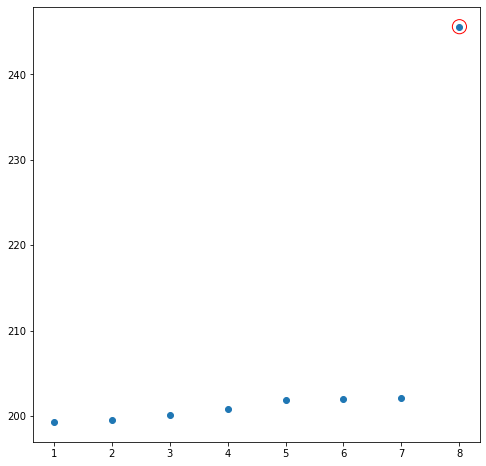

In [64]:
res = dixon_q_test(data,alpha=0.05,i=1,j=1,two_sided=True,lowest=True)
 
if len(res)==5:
    fig = plt.figure(figsize=(8,8))
    fig.set_facecolor('white')
    plt.scatter(range(len(data)), data)
    plt.scatter(res[0],res[1],s=200,facecolor='none',edgecolors='r')
    plt.xticks(range(len(data)), range(1,len(data)+1))
    plt.show()
else:
    print('There is no outlier')

## 5. Generalized Extreme Studentized Deviation Test

#### Generalized Extreme Studentized Deviation(G-ESD) Test는 Grubbs's Test가 이상치를 한 번에 하나밖에 찾지 못하는 단점을 보완한 검정방법이다.

#### G-ESD Test는 사전에 이상치의 개수를 r로 정해줌으로써 데이터에 여러 갱의 이상치가 있는지 통계적으로 검정해볼 수 있다.

In [89]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import t

In [137]:
# data = [9.1, 79.5, 26.8, 81.5, 19.1, 15.2, 22.6, 28.8, 24.1, 23.6,
#         18.6, 17.3, 25.8, 78.8, 23.1, 11.9, 20.1, 20.3, 14.1, 26.5]

# data = np.array(data)


file = "./data/sense.csv"
data = pd.read_csv(file, sep=",", encoding="euc-kr")

data['Sensor time'] = data['Sensor time'].astype(str)
data["Sensor time"]= data["Sensor time"].str[:12]
data['Sensor time'] = pd.to_datetime(data['Sensor time'], format="%Y%m%d%H%M")

data.drop('Time', axis = 1, inplace = True)
data.drop('Barn number', axis = 1, inplace = True)
data.drop('Module ID', axis = 1, inplace = True)

pivoted = data.pivot(['Sensor time','Collecting device ID'], 'Type', 'Vlaue')
#pivoted = data.pivot('Sensor time', 'Type', 'Vlaue')
pivoted = pivoted.reset_index()
pivoted_sorted = pivoted.sort_values(by='Sensor time' ,ascending=True)
filtered_df=pivoted_sorted.loc['2021-06-01':]
filtered_df

grouped_df_mean = filtered_df.groupby(pd.Grouper(key='Sensor time' ,freq='1h')).mean()
data = np.array(grouped_df_mean['co2'])
data = np.round(data, 1)

In [135]:
def generalized_esd(data,num_outliers,alpha=0.05):
    assert len(data)-num_outliers > 0, 'invalid num_outliers'
    n = len(data)
    temp_data = data.copy()
    res = []
    for i in range(num_outliers):
        mean = np.mean(temp_data)
        std = np.std(temp_data, ddof=1)
        diff = np.abs(temp_data-mean)
        R = np.max(diff)/std
 
        t_val = t.ppf(1-alpha/(2*(n-i)),n-i-2)
        lambda_val = (n-i-1)*t_val/np.sqrt((n-i-2+t_val**2)*(n-i))
 
        temp_idx = np.where(diff==np.max(diff))[0][0]
        temp_data_point = temp_data[temp_idx]
        idx = np.where(data == temp_data_point)[0][0] ## index of suspected outlier
        value = data[idx] ## suspected outlier
        flag = R > lambda_val
        res.append((idx,value,flag,R,lambda_val))
        temp_data = np.delete(temp_data,temp_idx)
 
    if res:
        idx_suspected_outlier = []
        for i, r in enumerate(res):
            if r[2] == True:
                idx_suspected_outlier.append(i)
 
        num_suspected_outlier = max(idx_suspected_outlier)+1
        outlier_idx = [res[i][0] for i in range(num_suspected_outlier)]
        outlier_idx = np.array(outlier_idx)
        values = data[outlier_idx]
        Rs = [res[i][3] for i in range(num_suspected_outlier)]
        lambdas = [res[i][4] for i in range(num_suspected_outlier)]
        return (outlier_idx, values, Rs, lambdas)
    else:
        return False ## no outlier detected

In [136]:
res = generalized_esd(data,num_outliers=10,alpha=0.05)
 
if len(res) == 4:
    fig = plt.figure(figsize=(8,8))
    fig.set_facecolor('white')
    plt.scatter(range(len(data)), data)
    plt.scatter(res[0],res[1],s=200,facecolor='none',edgecolors='r')
    plt.xticks(range(len(data)), range(1,len(data)+1))
    plt.show()
else:
    print(res)
    print('There is no outlier')

IndexError: index 0 is out of bounds for axis 0 with size 0